# Download PCB dataset

確認PCB data/PCB_DATASET底下的資料有那些項目 (確認解壓縮是否正確)

In [ ]:
from google.colab import drive
import zipfile
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/MyDrive/PCB_data.zip'
extracted_folder_path = '/content/PCB_data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print(f'ZIP 文件已成功解壓缩到 "{extracted_folder_path}" 目錄下。')


ZIP 文件已成功解壓缩到 "/content/PCB_data" 目錄下。


In [ ]:
import os
directory_path = '/content/PCB_data'
file_list = os.listdir(directory_path)

print("Files in directory:")
for file_name in file_list:
    print(file_name)

Files in directory:
train
test
val


# Data Preprocessing



Check JPG quantities

In [ ]:
import os

base_path = '/content/PCB_data/train/images'
folders = ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    jpg_count = len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
    print(f"{folder}: {jpg_count} JPG files")

Spurious_copper: 80 JPG files
Mouse_bite: 80 JPG files
Open_circuit: 80 JPG files
Missing_hole: 80 JPG files
Spur: 80 JPG files
Short: 81 JPG files


Check XML quantities

In [ ]:
import os
xml_folder_path = "/content/PCB_data/train/Annotations/"

xml_files = []
for folder in ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']:
    folder_path = os.path.join(xml_folder_path, folder)
    if os.path.isdir(folder_path):
        xml_files.extend([os.path.join(folder, f) for f in os.listdir(folder_path) if f.endswith('.xml')])

num_files = len(xml_files)
print(f"總共有 {num_files} 個XML檔案")

for folder in ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']:
    folder_path = os.path.join(xml_folder_path, folder)
    num_files_in_folder = len([f for f in os.listdir(folder_path) if f.endswith('.xml')])
    print(f"{folder} 資料夾中有 {num_files_in_folder} 個XML檔案")

總共有 481 個XML檔案
Spurious_copper 資料夾中有 80 個XML檔案
Mouse_bite 資料夾中有 80 個XML檔案
Open_circuit 資料夾中有 80 個XML檔案
Missing_hole 資料夾中有 80 個XML檔案
Spur 資料夾中有 80 個XML檔案
Short 資料夾中有 81 個XML檔案


In [ ]:
!pip install pillow

from PIL import Image
import os

original_folder = '/content/PCB_data/train/images'
resized_folder = '/content/PCB_resized/train'
os.makedirs(resized_folder, exist_ok=True)
folders = ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']

for folder in folders:
    folder_path = os.path.join(original_folder, folder)
    images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    os.makedirs(resized_folder, exist_ok=True)
    for image in images:
        image_path = os.path.join(folder_path, image)
        img = Image.open(image_path)
        output_path = os.path.join(resized_folder, image)
        img.save(output_path)
        print(f"已處理: {image}, 新檔案儲存在: {output_path}")
print("完成圖片大小調整並儲存到新的資料夾。")

已處理: 05_spurious_copper_04.jpg, 新檔案儲存在: /content/PCB_resized/train/05_spurious_copper_04.jpg
已處理: 04_spurious_copper_05.jpg, 新檔案儲存在: /content/PCB_resized/train/04_spurious_copper_05.jpg
已處理: 01_spurious_copper_18.jpg, 新檔案儲存在: /content/PCB_resized/train/01_spurious_copper_18.jpg
已處理: 01_spurious_copper_20.jpg, 新檔案儲存在: /content/PCB_resized/train/01_spurious_copper_20.jpg
已處理: 06_spurious_copper_04.jpg, 新檔案儲存在: /content/PCB_resized/train/06_spurious_copper_04.jpg
已處理: 04_spurious_copper_18.jpg, 新檔案儲存在: /content/PCB_resized/train/04_spurious_copper_18.jpg
已處理: 01_spurious_copper_15.jpg, 新檔案儲存在: /content/PCB_resized/train/01_spurious_copper_15.jpg
已處理: 01_spurious_copper_08.jpg, 新檔案儲存在: /content/PCB_resized/train/01_spurious_copper_08.jpg
已處理: 05_spurious_copper_09.jpg, 新檔案儲存在: /content/PCB_resized/train/05_spurious_copper_09.jpg
已處理: 05_spurious_copper_10.jpg, 新檔案儲存在: /content/PCB_resized/train/05_spurious_copper_10.jpg
已處理: 04_spurious_copper_08.jpg, 新檔案儲存在: /content/PCB_resized/train/04_

In [ ]:
original_folder = '/content/PCB_data/val/images'
resized_folder = '/content/PCB_resized/val'
os.makedirs(resized_folder, exist_ok=True)
folders = ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']

for folder in folders:
    folder_path = os.path.join(original_folder, folder)
    images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    os.makedirs(resized_folder, exist_ok=True)
    for image in images:
        image_path = os.path.join(folder_path, image)
        img = Image.open(image_path)
        output_path = os.path.join(resized_folder, image)
        img.save(output_path)
        print(f"已處理: {image}, 新檔案儲存在: {output_path}")
print("完成圖片大小調整並儲存到新的資料夾。")

已處理: 10_spurious_copper_04.jpg, 新檔案儲存在: /content/PCB_resized/val/10_spurious_copper_04.jpg
已處理: 09_spurious_copper_03.jpg, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_03.jpg
已處理: 09_spurious_copper_02.jpg, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_02.jpg
已處理: 09_spurious_copper_09.jpg, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_09.jpg
已處理: 09_spurious_copper_01.jpg, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_01.jpg
已處理: 10_spurious_copper_05.jpg, 新檔案儲存在: /content/PCB_resized/val/10_spurious_copper_05.jpg
已處理: 10_spurious_copper_02.jpg, 新檔案儲存在: /content/PCB_resized/val/10_spurious_copper_02.jpg
已處理: 09_spurious_copper_04.jpg, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_04.jpg
已處理: 09_spurious_copper_08.jpg, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_08.jpg
已處理: 09_spurious_copper_10.jpg, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_10.jpg
已處理: 09_spurious_copper_07.jpg, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_07.jpg

In [ ]:
import os
import xml.etree.ElementTree as ET
from tqdm import tqdm
import shutil

original_annotations_folder = '/content/PCB_data/train/Annotations'
resized_annotations_folder = '/content/PCB_resized/train'
os.makedirs(resized_annotations_folder, exist_ok=True)

for folder in folders:
    folder_path = os.path.join(original_annotations_folder, folder)

    xml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')]
    for xml_file in xml_files:
        xml_path = os.path.join(folder_path, xml_file)

        base_filename = os.path.splitext(xml_file)[0]
        output_xml_path = os.path.join(resized_annotations_folder, f"{base_filename}.xml")
        shutil.copy2(folder_path+'/'+xml_file, output_xml_path)
        print(f"已處理: {xml_file}, 新檔案儲存在: {output_xml_path}")

print("完成 XML 檔案大小調整並儲存到新的資料夾。")


已處理: 06_spurious_copper_07.xml, 新檔案儲存在: /content/PCB_resized/train/06_spurious_copper_07.xml
已處理: 07_spurious_copper_04.xml, 新檔案儲存在: /content/PCB_resized/train/07_spurious_copper_04.xml
已處理: 07_spurious_copper_03.xml, 新檔案儲存在: /content/PCB_resized/train/07_spurious_copper_03.xml
已處理: 06_spurious_copper_06.xml, 新檔案儲存在: /content/PCB_resized/train/06_spurious_copper_06.xml
已處理: 06_spurious_copper_01.xml, 新檔案儲存在: /content/PCB_resized/train/06_spurious_copper_01.xml
已處理: 04_spurious_copper_04.xml, 新檔案儲存在: /content/PCB_resized/train/04_spurious_copper_04.xml
已處理: 05_spurious_copper_10.xml, 新檔案儲存在: /content/PCB_resized/train/05_spurious_copper_10.xml
已處理: 01_spurious_copper_10.xml, 新檔案儲存在: /content/PCB_resized/train/01_spurious_copper_10.xml
已處理: 04_spurious_copper_01.xml, 新檔案儲存在: /content/PCB_resized/train/04_spurious_copper_01.xml
已處理: 04_spurious_copper_13.xml, 新檔案儲存在: /content/PCB_resized/train/04_spurious_copper_13.xml
已處理: 08_spurious_copper_03.xml, 新檔案儲存在: /content/PCB_resized/train/08_

In [ ]:
import os
import xml.etree.ElementTree as ET
from tqdm import tqdm
import shutil

original_annotations_folder = '/content/PCB_data/val/Annotations'
resized_annotations_folder = '/content/PCB_resized/val'
os.makedirs(resized_annotations_folder, exist_ok=True)

for folder in folders:
    folder_path = os.path.join(original_annotations_folder, folder)

    xml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')]
    for xml_file in xml_files:
        xml_path = os.path.join(folder_path, xml_file)

        base_filename = os.path.splitext(xml_file)[0]
        output_xml_path = os.path.join(resized_annotations_folder, f"{base_filename}.xml")
        shutil.copy2(folder_path+'/'+xml_file, output_xml_path)
        print(f"已處理: {xml_file}, 新檔案儲存在: {output_xml_path}")

print("完成 XML 檔案大小調整並儲存到新的資料夾。")


已處理: 10_spurious_copper_03.xml, 新檔案儲存在: /content/PCB_resized/val/10_spurious_copper_03.xml
已處理: 09_spurious_copper_04.xml, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_04.xml
已處理: 10_spurious_copper_05.xml, 新檔案儲存在: /content/PCB_resized/val/10_spurious_copper_05.xml
已處理: 09_spurious_copper_02.xml, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_02.xml
已處理: 09_spurious_copper_03.xml, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_03.xml
已處理: 09_spurious_copper_09.xml, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_09.xml
已處理: 09_spurious_copper_07.xml, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_07.xml
已處理: 09_spurious_copper_10.xml, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_10.xml
已處理: 09_spurious_copper_01.xml, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_01.xml
已處理: 09_spurious_copper_05.xml, 新檔案儲存在: /content/PCB_resized/val/09_spurious_copper_05.xml
已處理: 10_spurious_copper_04.xml, 新檔案儲存在: /content/PCB_resized/val/10_spurious_copper_04.xml

# Create train, val datasets and labels

In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

def convert_xml_to_yolo(xml_path, image_width, image_height, class_mapping):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    labels = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        if class_name not in class_mapping:
            continue

        class_id = class_mapping[class_name]
        bbox = obj.find('bndbox')

        x_center = (float(bbox.find('xmin').text) + float(bbox.find('xmax').text)) / 2.0 / image_width
        y_center = (float(bbox.find('ymin').text) + float(bbox.find('ymax').text)) / 2.0 / image_height
        width = (float(bbox.find('xmax').text) - float(bbox.find('xmin').text)) / image_width
        height = (float(bbox.find('ymax').text) - float(bbox.find('ymin').text)) / image_height

        labels.append(f"{class_id} {x_center} {y_center} {width} {height}")

    return labels

def create_yolo_labels(source_folder, output_folder, class_mapping):
    for xml_file in os.listdir(source_folder):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(source_folder, xml_file)

            image_file = os.path.splitext(xml_file)[0] + '.jpg'
            image_path = os.path.join(source_folder.replace('Annotations', 'JPEGImages'), image_file)
            img = Image.open(image_path)
            image_width, image_height = img.size

            labels = convert_xml_to_yolo(xml_path, image_width, image_height, class_mapping)

            output_path = os.path.join(output_folder, os.path.splitext(xml_file)[0] + '.txt')
            with open(output_path, 'w') as f:
                f.write('\n'.join(labels))

class_mapping = {'spurious_copper': 0, 'mouse_bite': 1, 'open_circuit': 2, 'missing_hole': 3, 'spur': 4, 'short': 5}

create_yolo_labels('/content/PCB_resized/train', '/content/PCB_resized/train', class_mapping)
create_yolo_labels('/content/PCB_resized/val', '/content/PCB_resized/val', class_mapping)


Visual inspection

Randomly selected image: 08_spurious_copper_04.jpg


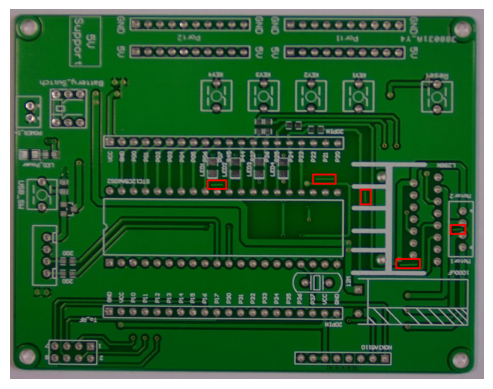

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def visualize_random_image_with_labels(images_folder, labels_folder):
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

    random_image_file = random.choice(image_files)
    print("Randomly selected image:", random_image_file)

    image_path = os.path.join(images_folder, random_image_file)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    label_file = os.path.splitext(random_image_file)[0] + '.txt'
    label_path = os.path.join(labels_folder, label_file)

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])

            img_height, img_width, _ = image.shape
            x, y, w, h = map(int, [x_center * img_width, y_center * img_height, width * img_width, height * img_height])
            x1, y1, x2, y2 = x - w//2, y - h//2, x + w//2, y + h//2
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 10)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

train_folder = '/content/PCB_resized/train'
labels_folder = '/content/PCB_resized/train'

visualize_random_image_with_labels(train_folder, labels_folder)

# YOLOv5s model

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -U -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
data_yaml_content = """

train: /content/PCB_resized/train
val: /content/PCB_resized/val
nc: 6
names: ['spurious_copper', 'mouse_bite', 'open_circuit', 'missing_hole', 'spur', 'short']

"""

with open('/content/yolov5/data/data.yaml', 'w') as f:
    f.write(data_yaml_content)

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/data/data.yaml'

In [ ]:
!python train.py --batch-size 16 --epochs 100 --data /content/yolov5/data/data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --name my_experiment --save-period 1 --project /content/yolov5/runs/

2024-06-02 14:06:56.794287: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 14:06:56.794340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 14:06:56.937185: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/yolov5/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, m

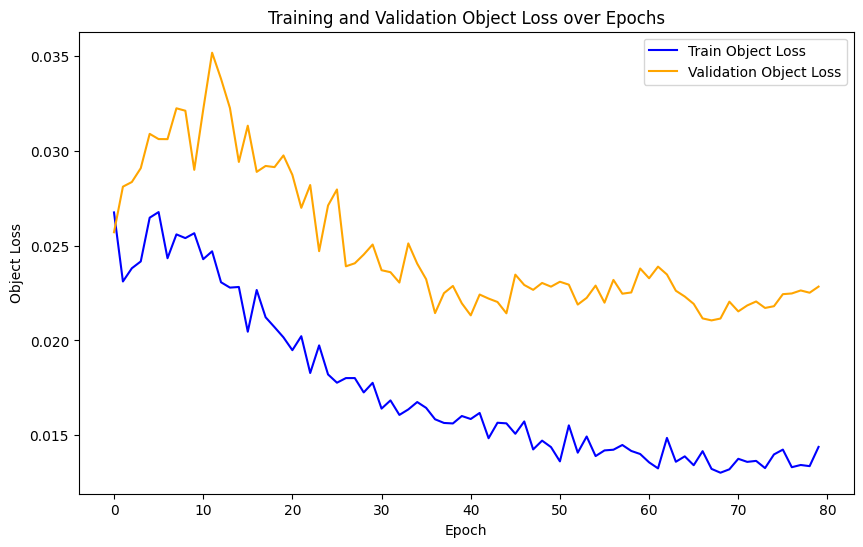

In [ ]:
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

results_path = '/content/yolov5/runs/my_experiment/results.csv'
df = pd.read_csv(results_path)

df.columns = df.columns.str.strip()

epochs = df['epoch']
train_box_loss = df['train/obj_loss']
val_box_loss = df['val/obj_loss']

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_box_loss, label='Train Object Loss', color='blue')
plt.plot(epochs, val_box_loss, label='Validation Object Loss', color='orange')

plt.title('Training and Validation Object Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Object Loss')

plt.legend()
plt.show()


# Create test dataset

In [ ]:
import os
import shutil

source_folder = '/content/PCB_data/test/images'
target_folder = '/content/PCB_resized/test'
os.makedirs(target_folder, exist_ok=True)

subfolders = ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole']
for subfolder in subfolders:
    subfolder_path = os.path.join(source_folder, subfolder)

    for filename in os.listdir(subfolder_path):
        #if filename.endswith('.jpg'):
        source_filepath = os.path.join(subfolder_path, filename)
        target_filepath = os.path.join(target_folder, filename)
        #shutil.copy2(source_filepath, target_filepath)
        img = Image.open(source_filepath)
        img_resized = img.resize((640, 640))
        img_resized.save(target_filepath)

print("檔案複製完成！")


檔案複製完成！


# 將PCB_test_resized裡的JPG送到之前的模型做測試

送入之前的模型訓練-->用best.pt

In [ ]:
!python yolov5/detect.py --weights /content/yolov5/runs/my_experiment2/weights/best.pt --conf 0.5 --source /content/PCB_resized/test --save-txt --save-conf --project /content/yolov5/runs/detect/

detect: weights=['/content/yolov5/runs/my_experiment2/weights/best.pt'], source=/content/PCB_resized/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolov5/runs/detect/, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/80 /content/PCB_resized/test/11_missing_hole_01.jpg: 640x640 6 missing_holes, 11.6ms
image 2/80 /content/PCB_resized/test/11_missing_hole_02.jpg: 640x640 6 missing_holes, 11.6ms
image 3/80 /content/PCB_resized/test/11_missing_hole_03.jp

Random visual inspection from test dataset

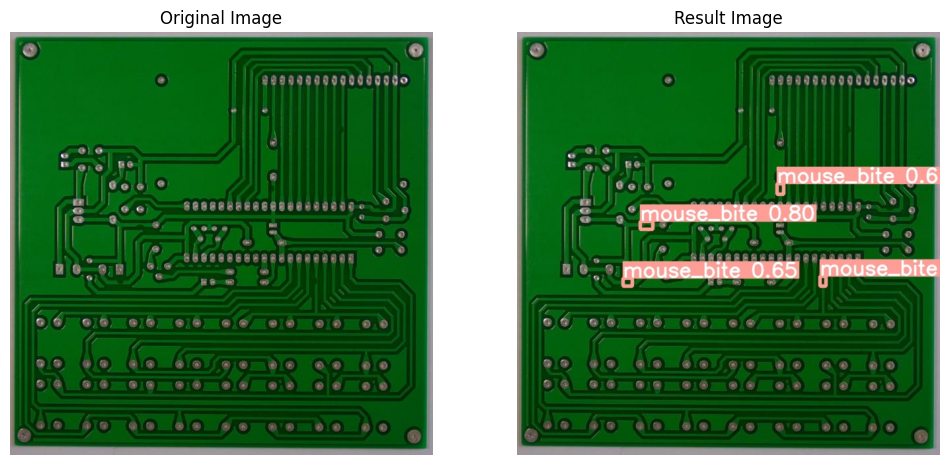

檔案名稱: 12_mouse_bite_06.jpg
類別: 0, 位置: [0.59, 0.01, 0.02, 0.51]
類別: 0, 位置: [0.59, 0.02, 0.02, 0.65]
類別: 0, 位置: [0.37, 0.02, 0.03, 0.66]
類別: 0, 位置: [0.46, 0.03, 0.02, 0.80]


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

original_folder = 'PCB_resized/test'
result_folder = 'yolov5/runs/detect/exp3'

original_files = [f for f in os.listdir(original_folder) if f.endswith('.jpg')]

selected_file = random.choice(original_files)
selected_original_filepath = os.path.join(original_folder, selected_file)

original_img = Image.open(selected_original_filepath)
result_file = os.path.join(result_folder, selected_file)
result_img = Image.open(result_file)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_img)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(result_img)
axes[1].set_title('Result Image')
axes[1].axis('off')
plt.show()
print("檔案名稱:", selected_file)

label_filepath = os.path.join(result_folder, 'labels', os.path.splitext(selected_file)[0] + '.txt')
if os.path.exists(label_filepath):
    with open(label_filepath, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.split()[1:])
            print(f"類別: {int(class_id)}, 位置: [{x_center:.2f}, {y_center:.2f}, {width:.2f}, {height:.2f}]")
else:
    print(f"未找到標籤檔案 {label_filepath}")
